# Practical 2 - Haiwen Huang

In [11]:
from sklearn.linear_model import LogisticRegression
from nbc import NBC
import numpy as np
import matplotlib.pyplot as plt

## Handin 1
C is the inverse of lambda;

When lambda is 0.1, we should set C to be 10

## Handin 2 Experiments

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris['data'], iris['target']
N, D = X.shape
num_classes = len(np.unique(y))
Ntrain = int(0.8 * N)

In [9]:
def get_test_error():
    NBC_error = []
    LR_error = []
    for i in range(10):
        X_i = Xtrain[:int(Ntrain*0.1*(i+1))]
        y_i = ytrain[:int(Ntrain*0.1*(i+1))]
        nbc = NBC(feature_types=['r']*D, num_classes=num_classes)
        nbc.fit(X_i, y_i)
        err1 = np.sum(nbc.predict(Xtest) != ytest)/len(ytest)
        lr = LogisticRegression()
        lr.fit(X_i, y_i)
        err2 = np.sum(lr.predict(Xtest) != ytest)/len(ytest)
        NBC_error.append(err1)
        LR_error.append(err2)
    return np.array(NBC_error), np.array(LR_error)

In [19]:
rand_times = 200
NBC_ERROR = np.zeros((rand_times, 10))
LR_ERROR = np.zeros((rand_times, 10))

for i in range(rand_times):
    shuffler = np.random.permutation(N)
    Xtrain = X[shuffler[:Ntrain]]
    ytrain = y[shuffler[:Ntrain]]
    Xtest = X[shuffler[Ntrain:]]
    ytest = y[shuffler[Ntrain:]]
    nbc_err, lr_err = get_test_error()
    NBC_ERROR[i, :] = nbc_err
    LR_ERROR[i, :] = lr_err
avg_nbc_err = NBC_ERROR.mean(axis=0)
avg_lr_err = LR_ERROR.mean(axis=0)


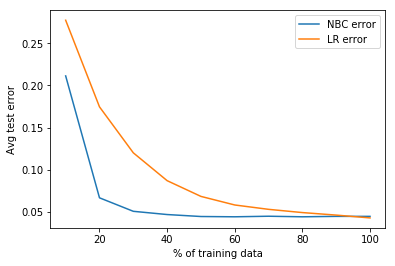

In [25]:
plt.plot(range(10, 110, 10), avg_nbc_err)
plt.plot(range(10, 110, 10), avg_lr_err)
plt.xlabel('% of training data')
plt.ylabel('Avg test error')
plt.legend(['NBC error', 'LR error'])